In [1]:
import pandas as pd

In [3]:
pulls=pd.read_csv('pulls.csv')
pull_files=pd.read_csv('pull_files.csv')

In [4]:
pulls.head(5)

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [5]:
# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'],utc='true')

In [6]:
pulls.head(5)

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00


In [7]:
pull_files.head(5)

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [8]:
# Merge the two DataFrames
data = pd.merge(pulls,pull_files,on='pid')
data

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
...,...,...,...,...
85583,547354,szeiger,2011-12-01 14:03:23+00:00,test/files/run/bitsets.check
85584,547354,szeiger,2011-12-01 14:03:23+00:00,test/files/run/bitsets.scala
85585,547150,odersky,2011-12-01 12:39:40+00:00,src/compiler/scala/tools/nsc/transform/LiftCod...
85586,547150,odersky,2011-12-01 12:39:40+00:00,src/library/scala/reflect/api/Trees.scala


In [10]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year



In [11]:
data

,pid,user,date,file,month,year
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java,1,2018
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala,1,2018
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala,1,2018
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check,1,2018
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java,1,2018
...,...,...,...,...,...,...
85583,547354,szeiger,2011-12-01 14:03:23+00:00,test/files/run/bitsets.check,12,2011
85584,547354,szeiger,2011-12-01 14:03:23+00:00,test/files/run/bitsets.scala,12,2011
85585,547150,odersky,2011-12-01 12:39:40+00:00,src/compiler/scala/tools/nsc/transform/LiftCod...,12,2011
85586,547150,odersky,2011-12-01 12:39:40+00:00,src/library/scala/reflect/api/Trees.scala,12,2011


In [14]:
# Group by the month and year and count the pull requests
counts = data.groupby(['month','year'])['pid'].count()

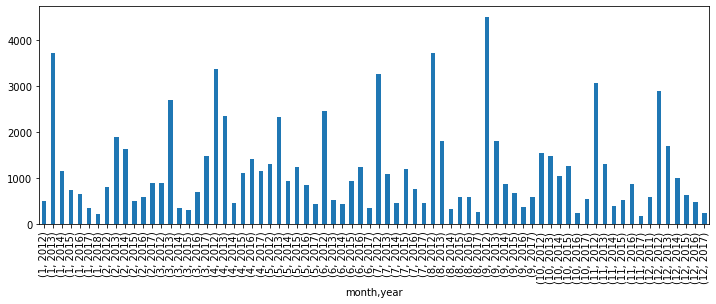

In [15]:
# Plot the results
counts.plot(kind='bar', figsize = (12,4))

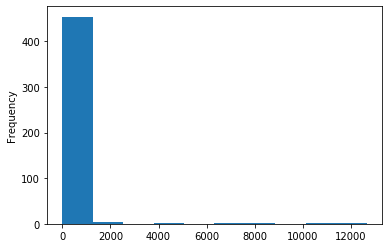

In [16]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby('user')['pid'].count()

# Plot the histogram
by_user.plot(kind='hist')

In [18]:
# Identify the last 10 pull requests
last_10 = data.nlargest(10,columns='date')
last_10

,pid,user,date,file,month,year
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java,1,2018
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala,1,2018
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala,1,2018
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check,1,2018
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java,1,2018
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java,1,2018
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala,1,2018
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala,1,2018
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...,1,2018
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....,1,2018


In [21]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10,columns='date')

# Join the two data sets
joined_pr = pd.merge(pull_files,last_10,on='pid')

# Identify the unique files
files = set(joined_pr['file'])
#this works also=
#files=joined_pr.drop_duplicates(subset='file')
#files=joined_pr['file'].unique()

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [29]:

# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()

# Print the top 3 developers
print(author_counts.nlargest(3, 'pid'))

          pid  date  file  month  year
user                                  
xeno-by    11    11    11     11    11
retronym    5     5     5      5     5
soc         4     4     4      4     4


In [30]:
file_pr

,pid,user,date,file,month,year
13,162838837,zuvizudar,2018-01-14 19:16:16+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2018
26951,22845163,retronym,2014-10-16 10:23:42+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,10,2014
32753,12102550,xeno-by,2014-02-01 01:19:58+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2014
35420,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
46700,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
47009,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
47567,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
47965,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
49156,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,3,2013
51313,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013


In [ ]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

In [31]:
file_pr

,pid,user,date,file,month,year
13,162838837,zuvizudar,2018-01-14 19:16:16+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2018
26951,22845163,retronym,2014-10-16 10:23:42+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,10,2014
32753,12102550,xeno-by,2014-02-01 01:19:58+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2014
35420,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
46700,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
47009,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
47567,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
47965,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
49156,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,3,2013
51313,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013


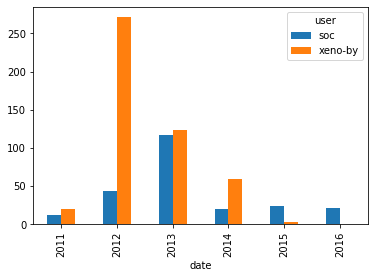

In [36]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(['user', by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar')

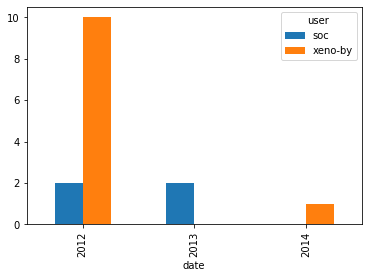

In [44]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year])['pid'].count().reset_index()

# Transform the data into a wide format
by_file_wide =  grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')